# Naive Agent in the NumberLine Environment

This is the simplest agent exploring the Numberline environment. The Naive agent moves randomly and memorizes where it has been in a tree. The NumberLine environment has 5 available actions corresponding to +0 +1 -1 +10 and -9, with these five actions the naïve agent traverses the natural numbers. Once it has explored at random for 1000 actions you can ask it to move anywhere on the number line it has seen before: moving on the number line is exactly the same thing as manipulating the environment since in this environment the only thing the agent can manipulate is it's position in the environment. Still, no matter the complexity of the environment the agent can be thought of as merely traversing its state-space just as it traverses the natural numbers in this simple environment.

First we import the agent and the environment...

In [1]:
from sensorimotor.agents import NaiveAgent
from sensorimotor.envs import FiniteNumberLine

import time

Initialize the Environment and the Agent...

In [2]:
env = FiniteNumberLine()
agent = NaiveAgent(env)

Training: allow the agent to explore (at random in this case)...

In [ ]:
agent.train(verbose=True)
# training doesn't update visualization,.. doesn't update pairs...

In [ ]:
agent.state

In [ ]:
len(agent.graph.pairs)

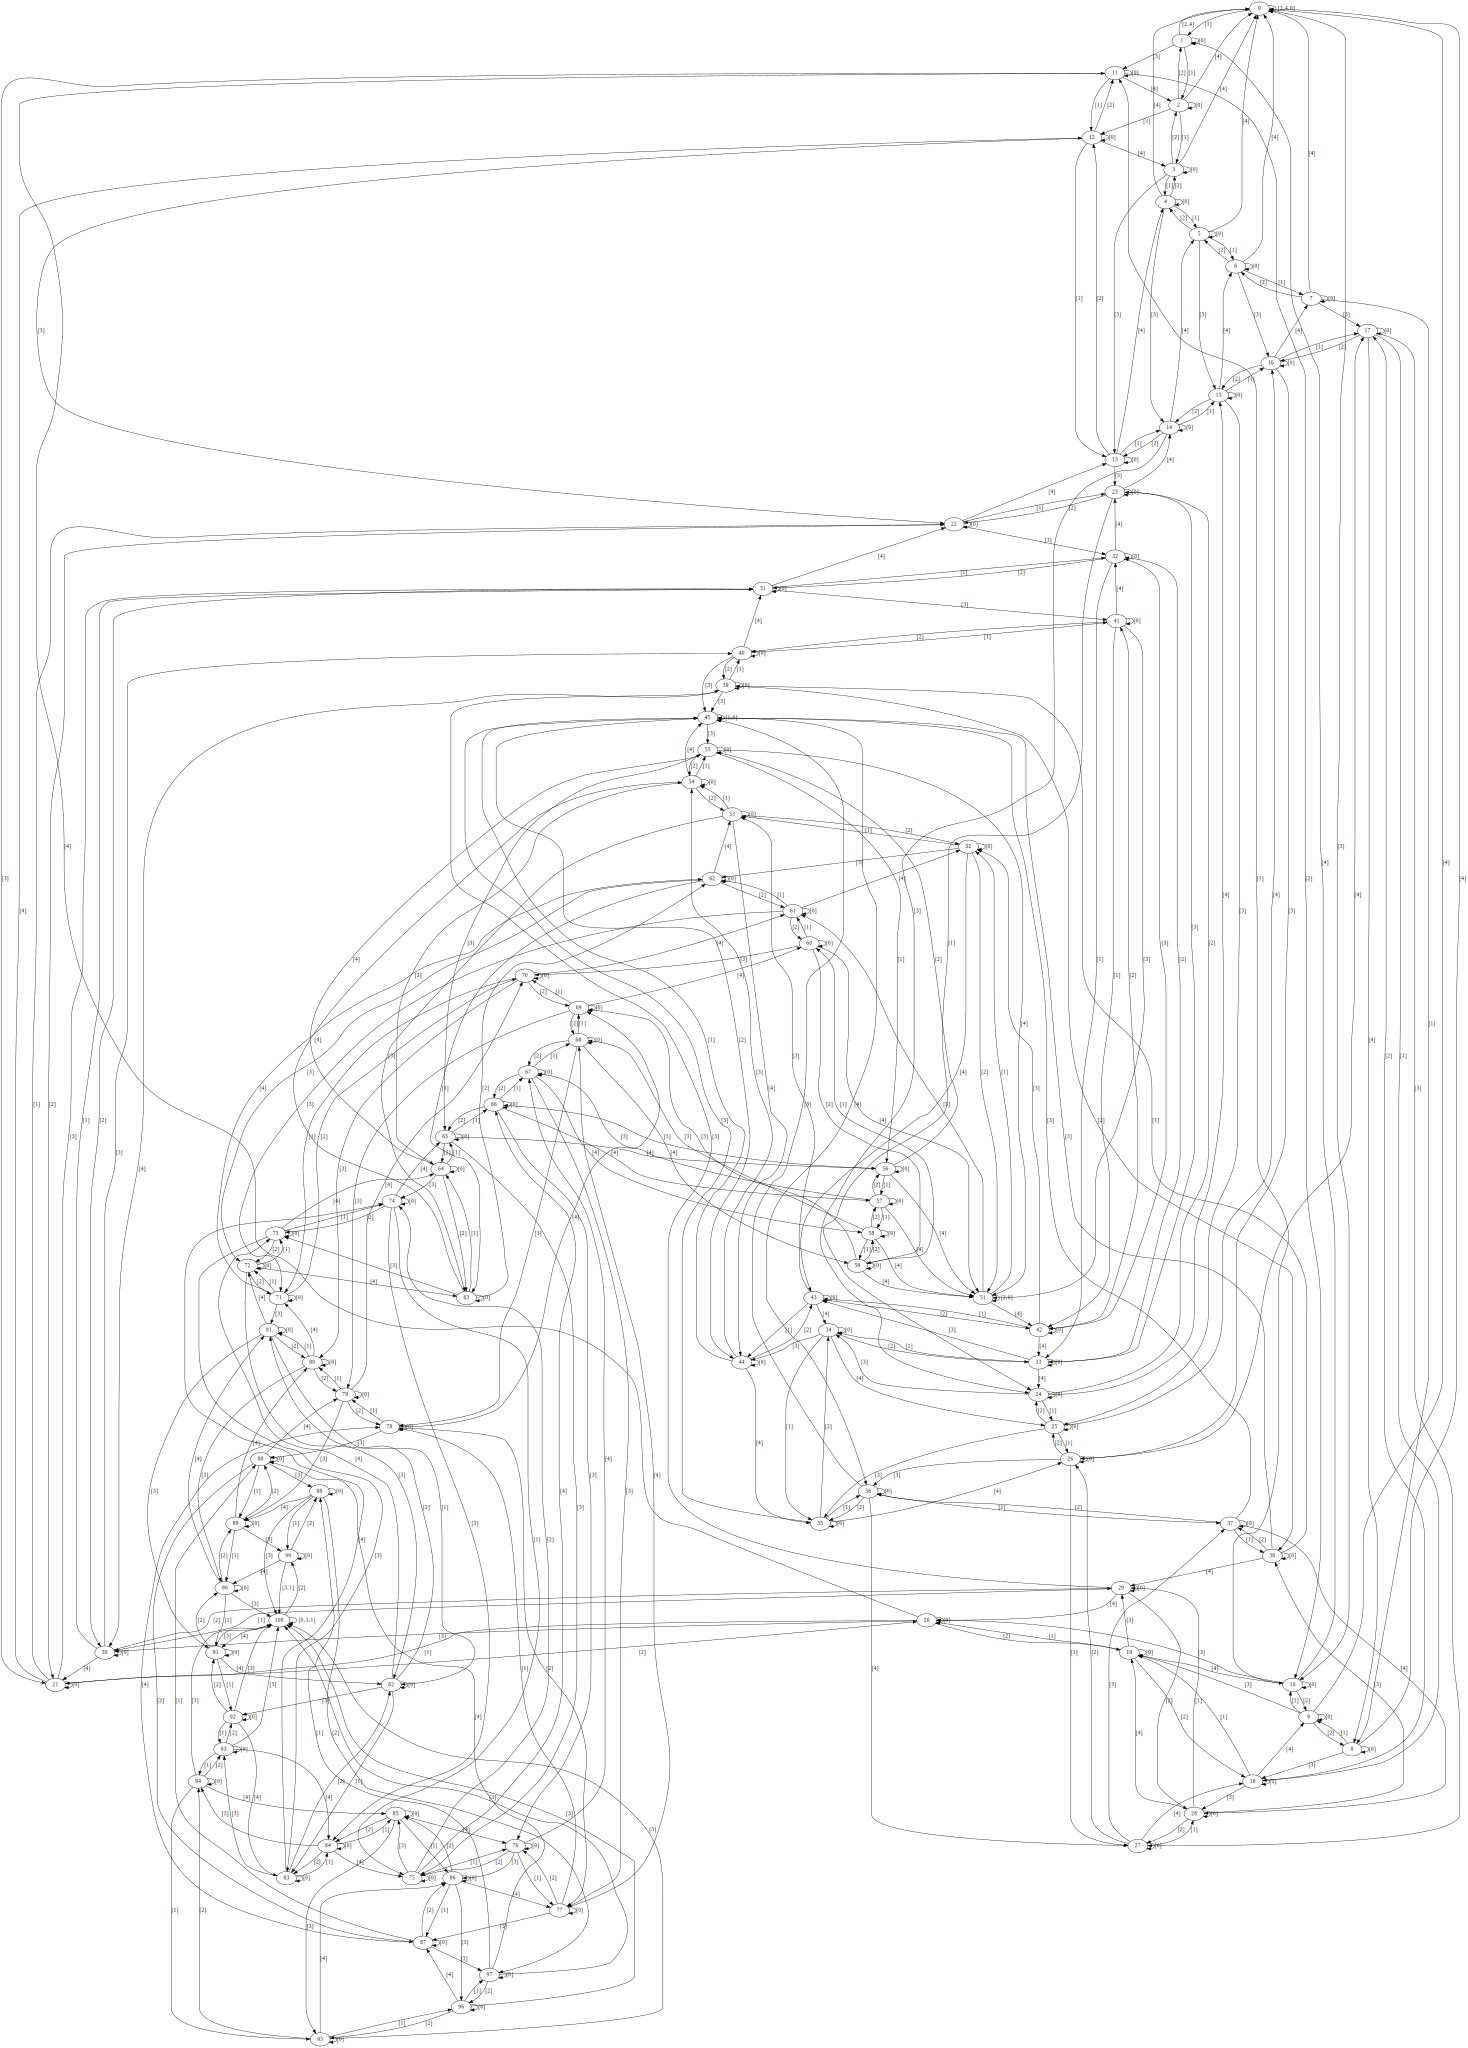

In [4]:
agent.graph.visualize()

In [8]:
starting_state = 1
goal_state = 46
agent.get_path(target=goal_state, start=starting_state)

In [ ]:
agent.graph.path(parent=1

In [ ]:
starting_state = 10
goal_state = 15
agent.get_path_simply(target=goal_state, start=starting_state)

Since this is a finite environment and we know it we can tell the agent to train until it isn't getting any suprise anymore

In [3]:
agent.fully_train(verbose=True)

.........Iteration: 8 Graph Size: 471


Now that it's done training, (via it's random walk) inspect which state of the environment it ended up on...

In [ ]:
#entire_tree = agent.previous
final_state = agent.previous
final_state

Let's inspect how it got there by looking at the full detail of this node (the naive agent makes an explicit memory everytime it sees a new state)...

In [ ]:
agent.graph

Notice the last action it took (to get to its current state) is listed as 'edge' above.
```
    0 = do nothing
    1 = +1
    2 = -1
    3 = +10
    4 = -9
```
And let's ask the agent to figure out how to get from somehting it has seen before to the last state of the environment that it saw...

In [ ]:
print('going from', three_b4_final, 'to', final_state, 'using the environment actions...')
print(agent.get_path(target=final_state, start=three_b4_final))
print('...which correspond to...')
print([
    {0: '+0', 1: '+1', 2: '-1', 3: '+10', 4: '-9'}.get(action, '+0')
    for action in agent.get_path(target=final_state, start=three_b4_final)])

Pretty cool, the agent knows how to manipulate the environment from one state to produce another state (that is, it knows how to traverse the state space of the environment, at least in this case)...

Now let's actually ask it to do so. We'll reset the state to something it has seen before...

In [ ]:
agent.reset(three_b4_final)

Then we'll ask it to execute the steps to get to the last state of the environment saw...

In [ ]:
agent.do(final_state, verbose=True)

Let's try a longer environment manipulation: from the first thing the agent ever saw to the last thing the agent ever saw...

In [ ]:
print(agent.get_path(target=final_state, start=14))

The above action-path may be less than 1000 steps, this is because the agent looks for the shortest path it has ever seen between the two state representations.

In [ ]:
x = -21
for i in agent.get_path(target=final_state, start=14):
    print(eval(str(x)+{0: '+0', 1: '+1', 2: '-1', 3: '+10', 4: '-9'}.get(i, '+0')))

In [ ]:
eval(''.join(['-21'] + [{0: '+0', 1: '+1', 2: '-1', 3: '+10', 4: '-9'}.get(x, '+0') for x in agent.get_path(target=final_state, start=14)]))

We'll close the environment...

In [ ]:
env.close()

## Review

The naive agent makes explicit memory, it doesn't generalize in any way. It doesn't understand patterns. It can't detect that this one kind of action is exactly the opposite from another kind of action. It can't extrapolate or draw conclusions. It is not intelligent.

If the environment is small the agent is able to memorize the environment and produce any configuration of it that you would like. This is the essential role of any sensorimotor inference engine: that it can manipulate the environment it is connected to merely by you showing it the state of the environment you would like to see.

In order to achieve scale such that a Sensorimotor agent can manipulate any size and complexity of a deterministic environment we need to infuse it with more intelligence.

In [ ]:
import anytree
print(anytree.RenderTree(
    agent.root,
    #style=anytree.render.AsciiStyle()
    )
 )